# Marques probe location

author: steeve.laquitaine@epfl.ch  
date: 22.08.2023  
last modified: 18.01.2024  

## Setup 

Create and activate `npx_10m_384ch_unit_classes`

In [1]:
# SET PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import h5py
import MEAutility as MEA
from sklearn.decomposition import PCA
import spikeinterface as si

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"

os.chdir(PROJ_PATH)
from src.nodes.load import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.utils import get_config
from src.nodes.dataeng.silico.filtering import get_hex_01_cells, filter_microcircuit_cells
from src.nodes.utils import write_metadata
from src.nodes.dataeng.silico import probe_wiring
from src.nodes import viz 


# SETUP CONFIG
data_conf, param_conf = get_config("vivo_marques", "c26").values()
WIRED_PATH = data_conf["probe_wiring"]["output"]

2024-01-18 17:38:55,856 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-18 17:38:56,006 - root - utils.py - get_config - INFO - Reading experiment config. - done


--- Logging error ---
Traceback (most recent call last):
  File "/gpfs/bbp.cscs.ch/home/laquitai/spack_install/environments/spack_python3_9/.spack-env/view/lib/python3.9/logging/handlers.py", line 73, in emit
    if self.shouldRollover(record):
  File "/gpfs/bbp.cscs.ch/home/laquitai/spack_install/environments/spack_python3_9/.spack-env/view/lib/python3.9/logging/handlers.py", line 189, in shouldRollover
    self.stream = self._open()
  File "/gpfs/bbp.cscs.ch/home/laquitai/spack_install/environments/spack_python3_9/.spack-env/view/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/logs/info.log'
Call stack:
  File "/gpfs/bbp.cscs.ch/home/laquitai/spack_install/environments/spack_python3_9/.spack-env/view/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_global

### Check against our ProbeInterface reconstruction

In [3]:
# 40 secs
# wire recording with probe
Recording = si.load_extractor(WIRED_PATH)

# get contact coordinates
Probe = Recording.get_probe()

### Plot

In [18]:
sum(Probe.contact_positions)

array([     0.,   9216., 733440.])

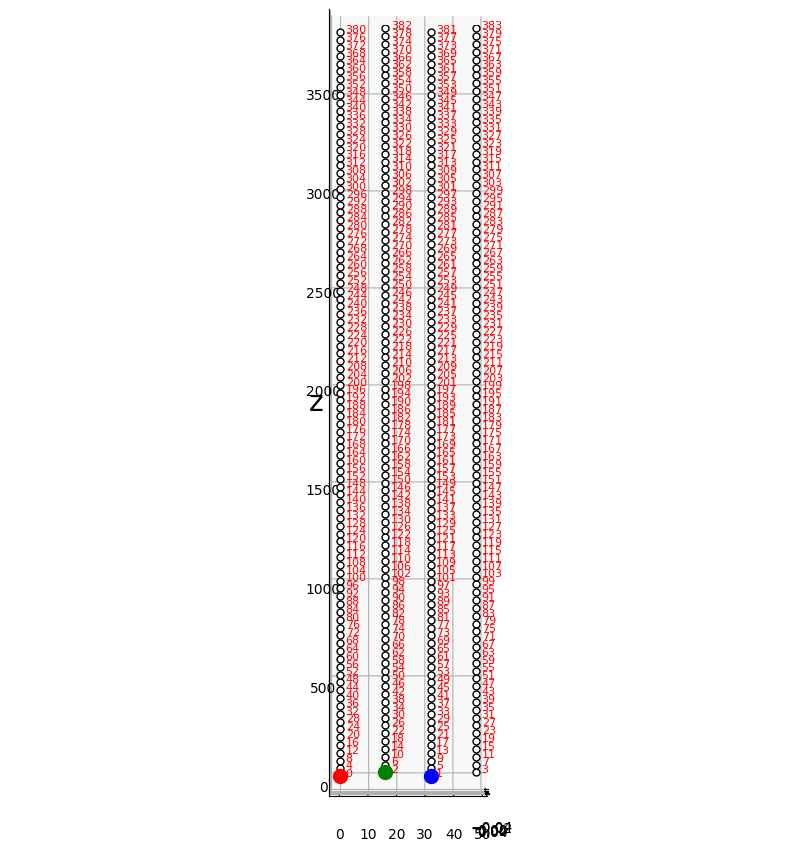

In [50]:
# plot file contact with ids
# fig, ax = plt.subplots(1, 1, figsize=(2, 10), mode="projection_3D")
ax = plt.figure(figsize=(10, 40)).add_subplot(projection="3d")
ax.view_init(0, 0, 0)
ax.plot(
    Probe.contact_positions[:, 0],
    Probe.contact_positions[:, 1],
    Probe.contact_positions[:, 2],
    "o",
    markerfacecolor="w",
    color="k",
    markersize=5,
)
for ix in range(len(Probe.contact_positions)):
    ax.text(
        Probe.contact_positions[ix, 0],
        Probe.contact_positions[ix, 1] + 2,
        Probe.contact_positions[ix, 2],
        "%s" % (str(contact_ids[ix])),
        size=8,
        zorder=100,
        color="r",
    )
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)
ax.set_zlabel("z", fontsize=20)

# highlight order
# first site
ax.plot(
    Probe.contact_positions[0, 0],
    Probe.contact_positions[0, 1],
    Probe.contact_positions[0, 2],
    "ro",
    markersize=10,
)

# highlight order
# second site
ax.plot(
    Probe.contact_positions[1, 0],
    Probe.contact_positions[1, 1],
    Probe.contact_positions[1, 2],
    "bo",
    markersize=10,
)

# highlight order
# third site
ax.plot(
    Probe.contact_positions[2, 0],
    Probe.contact_positions[2, 1],
    Probe.contact_positions[2, 2],
    "go",
    markersize=10,
)
ax.set_box_aspect((1, 2, 10))

contact ids can be empty. In Kilosort3 they are ordered according to the rows of the contacts coordinates rows and assigned labels 1:384

In [6]:
print("channel ids: \n", Recording.get_channel_ids())

print("contact_ids:", Probe.contact_ids)

channel ids: 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242

Our reconstructed coordinates

# References

(1) https://bbpgitlab.epfl.ch/nse/bluepy/-/blob/main/examples/ipython_notebooks/Usecase%201%20-%20Selecting%20cells%20from%20a%20circuit.ipynb 

(2) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/index.html 

(3) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/circuit.html 